packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
import calendar
import datetime

importing data

In [4]:
maindata=pd.read_excel('/content/MainData_Final.xlsx')

In [5]:
aircraft_group=pd.read_csv('/content/Aircraft Groups.csv')
aircraft_type=pd.read_csv('/content/Aircraft Types.csv')
distance_group=pd.read_csv('/content/Distance Groups.csv')
airlines=pd.read_csv('/content/Airlines.csv')
carrier_group=pd.read_csv('/content/Carrier Groups.csv')
carrier_operating_region=pd.read_csv('/content/Carrier Operating Region.csv')
destination_market=pd.read_excel('/content/Destination Market.xlsx')
flight_types=pd.read_csv('/content/Flight Types.csv')
origin_market=pd.read_excel('/content/Origin Market.xlsx')

data cleaning

In [6]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110851 entries, 0 to 110850
Data columns (total 54 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   %Airline ID                       110851 non-null  int64  
 1   %Carrier Group ID                 110851 non-null  int64  
 2   %Unique Carrier Code              110759 non-null  object 
 3   %Unique Carrier Entity Code       110851 non-null  int64  
 4   %Region Code                      110851 non-null  object 
 5   %Origin Airport ID                110851 non-null  int64  
 6   %Origin Airport Sequence ID       110851 non-null  int64  
 7   %Origin Airport Market ID         110851 non-null  int64  
 8   %Origin World Area Code           110851 non-null  int64  
 9   %Destination Airport ID           110851 non-null  int64  
 10  %Destination Airport Sequence ID  110851 non-null  int64  
 11  %Destination Airport Market ID    110851 non-null  i

renaming columns

In [7]:
maindata.rename(columns={'%Airline ID':'airline_id',
                         '%Carrier Group ID':'carrier_group_id',
                         '%Unique Carrier Code':'unique_carrier_code',
                         '%Unique Carrier Entity Code':'unique_carrier_entity_code',
                         '%Region Code':'region_code',
                         '%Origin Airport ID':'origin_airport_id',
                         '%Origin Airport Sequence ID':'origin_airport_sequence_id',
                         '%Origin Airport Market ID':'origin_airport_market_id',
                         '%Origin World Area Code':'origin_world_area_code',
                         '%Destination Airport ID':'destination_airport_id',
                         '%Destination Airport Sequence ID':'destination_airport_sequence_id',
                         '%Destination Airport Market ID':'destination_airport_market_id',
                         '%Destination World Area Code':'destination_world_area_code',
                         '%Aircraft Group ID':'aircraft_group_id',
                         '%Aircraft Type ID':'aircraft_type_id',
                         '%Aircraft Configuration ID':'aircraft_configuration_id',
                         '%Distance Group ID':'distance_group_id',
                         '%Service Class ID':'service_class_id',
                         '%Datasource ID':'datasource_id',
                         '# Departures Scheduled':'departure_schedule',
                         '# Departures Performed':'departure_performed',
                         '# Payload':'payload',
                         'Distance':'distance',
                         '# Available Seats':'available_seats',
                         '# Transported Passengers':'transported_passengers',
                         '# Transported Freight':'transported_freight',
                         '# Transported Mail':'transported_mail',
                         '# Ramp-To-Ramp Time':'ramp_to_ramp_time',
                         '# Air Time':'air_time',
                         'Unique Carrier':'unique_carrier',
                         'Carrier Code':'carrier_code',
                         'Carrier Name':'carrier_name',
                         'Origin Airport Code':'origin_airport_code',
                         'Origin City':'origin_city',
                         'Origin State Code':'origin_state_code',
                         'Origin State FIPS':'origin_state_fips',
                         'Origin State':'origin_state',
                         'Origin Country Code':'origin_country_code',
                         'Origin Country':'origin_country',
                         'Destination Airport Code':'destinatio_airport_code',
                         'Destination City':'destination_city',
                         'Destination State Code':'destination_state_code',
                         'Destination State FIPS':'destination_state_fips',
                         'Destination State':'destination_state',
                         'Destination Country Code':'destination_country_code',
                         'Destination Country':'destination_country',
                         'Year':'year',
                         'Month (#)':'month_no',
                         'Day':'day',
                         'From - To Airport Code':'from_to_airport_code',
                         'From - To Airport ID':'from_to_airport_id',
                         'From - To City':'from_to_city',
                         'From - To State Code':'from_to_state_code',
                         'From - To State':'from_to_state'},
                  inplace=True)
aircraft_group.rename(columns={'%Aircraft Group ID':'aircraft_group_id',
                               'Aircraft Group':'aircraft_group'},
                      inplace=True)
aircraft_type.rename(columns={'%Aircraft Type ID':'aircraft_type_id',
                               'Aircraft Type':'aircraft_type'},
                      inplace=True)
airlines.rename(columns={'%Airline ID':'airline_id',
                         'Airline':'airlines'},
                inplace=True)
carrier_group.rename(columns={'%Carrier Group ID':'carrier_group_id',
                              'Carrier Group':'carrier_group'},
                     inplace=True)
carrier_operating_region.rename(columns={'%Region Code':'region_code',
                                         "Carrier's Operating Region":'carriers_operating_region'},
                                inplace=True)
distance_group.rename(columns={'%Distance Group ID':'distance_group_id',
                               'Distance Interval':'distance_interval'},
                      inplace=True)
flight_types.rename(columns={'%Datasource ID':'datasource_id',
                             'Flight Type':'flight_type'},
                    inplace=True)

In [8]:
destination_market.columns

Index(['%Destination Airport Market ID\tDestination Market', 'Unnamed: 1'], dtype='object')

In [9]:
destination_market.rename(columns={'%Destination Airport Market ID\tDestination Market':'destination_airport_market_id destination_market',
                                   'Unnamed: 1':'dest_state_code'},
                          inplace=True)

In [10]:
# splitting columns
destination_market[['destination_airport_market_id','destination_market']]=destination_market['destination_airport_market_id destination_market'].str.split('\t',expand=True)
destination_market=destination_market[['destination_airport_market_id','destination_market','dest_state_code']]
destination_market

,destination_airport_market_id,destination_market,dest_state_code
0,30003,"""Granite Mountain","AK"""
1,30004,"""Lik","AK"""
2,30005,"""Little Squaw","AK"""
3,30006,"""Kizhuyak","AK"""
4,30007,"""Klawock","AK"""
...,...,...,...
1898,36507,"""Chemehuevi Valley","CA"""
1899,36509,"""Carlisle","PA"""
1900,36510,"""Middletown","DE"""
1901,36511,"""Big Piney","WY"""


In [11]:
destination_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   destination_airport_market_id  1903 non-null   object
 1   destination_market             1903 non-null   object
 2   dest_state_code                1903 non-null   object
dtypes: object(3)
memory usage: 44.7+ KB


In [12]:
destination_market['destination_airport_market_id']=pd.to_numeric(destination_market['destination_airport_market_id'].astype('int64'))

In [13]:
origin_market.rename(columns={'%Origin  Airport Market ID\tOrigin  Market':'origin_airport_market_id_origin_market',
                                   'Unnamed: 1':'ori_state_code'},
                          inplace=True)

In [14]:
# splitting column
origin_market[['origin_airport_market_id','origin_market']]=origin_market['%Origin Airport Market ID\tOrigin Market'].str.split('\t',expand=True)
origin_market=origin_market[['origin_airport_market_id','origin_market','ori_state_code']]
origin_market

,origin_airport_market_id,origin_market,ori_state_code
0,30003,"""Granite Mountain","AK"""
1,30004,"""Lik","AK"""
2,30005,"""Little Squaw","AK"""
3,30006,"""Kizhuyak","AK"""
4,30007,"""Klawock","AK"""
...,...,...,...
1836,36508,"""Centralia","Canada"""
1837,36509,"""Carlisle","PA"""
1838,36510,"""Middletown","DE"""
1839,36511,"""Big Piney","WY"""


In [15]:
origin_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   origin_airport_market_id  1841 non-null   object
 1   origin_market             1841 non-null   object
 2   ori_state_code            1841 non-null   object
dtypes: object(3)
memory usage: 43.3+ KB


In [16]:
origin_market['origin_airport_market_id']=pd.to_numeric(origin_market['origin_airport_market_id'].astype('int64'))

In [17]:
origin_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   origin_airport_market_id  1841 non-null   int64 
 1   origin_market             1841 non-null   object
 2   ori_state_code            1841 non-null   object
dtypes: int64(1), object(2)
memory usage: 43.3+ KB


merging table

In [18]:
high_cloud_airlines=maindata.merge(aircraft_group,how='left')
high_cloud_airlines=high_cloud_airlines.merge(airlines,how='left')
high_cloud_airlines=high_cloud_airlines.merge(carrier_operating_region,how='left')
high_cloud_airlines=high_cloud_airlines.merge(carrier_group,how='left')
high_cloud_airlines=high_cloud_airlines.merge(flight_types,how='left')
high_cloud_airlines=high_cloud_airlines.merge(origin_market,how='left')
high_cloud_airlines=high_cloud_airlines.merge(destination_market,how='left')
high_cloud_airlines=high_cloud_airlines.merge(distance_group,how='left')
high_cloud_airlines=high_cloud_airlines.merge(aircraft_type,how='left')

In [19]:
# merged data
high_cloud_airlines.columns

Index(['airline_id', 'carrier_group_id', 'unique_carrier_code',
       'unique_carrier_entity_code', 'region_code', 'origin_airport_id',
       'origin_airport_sequence_id', 'origin_airport_market_id',
       'origin_world_area_code', 'destination_airport_id',
       'destination_airport_sequence_id', 'destination_airport_market_id',
       'destination_world_area_code', 'aircraft_group_id', 'aircraft_type_id',
       'aircraft_configuration_id', 'distance_group_id', 'service_class_id',
       'datasource_id', 'departure_schedule', 'departure_performed', 'payload',
       'distance', 'available_seats', 'transported_passengers',
       'transported_freight', 'transported_mail', 'ramp_to_ramp_time',
       'air_time', 'unique_carrier', 'carrier_code', 'carrier_name',
       'origin_airport_code', 'origin_city', 'origin_state_code',
       'origin_state_fips', 'origin_state', 'origin_country_code',
       'origin_country', 'destinatio_airport_code', 'destination_city',
       'destination

dropping duplicates

In [20]:
high_cloud_airlines=high_cloud_airlines.drop_duplicates()

In [21]:
high_cloud_airlines

,airline_id,carrier_group_id,unique_carrier_code,unique_carrier_entity_code,region_code,origin_airport_id,origin_airport_sequence_id,origin_airport_market_id,origin_world_area_code,destination_airport_id,...,airlines,carriers_operating_region,carrier_group,flight_type,origin_market,ori_state_code,destination_market,dest_state_code,distance_interval,aircraft_type
0,20336,5,H6,6984,D,14485,1448501,34485,1,13970,...,Hageland Aviation Service: H6,Domestic,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only","""Red Dog","AK""","""Kotzebue","AK""",Less Than 500 Miles,Cessna 208 Caravan
1,20340,5,K5,6966,D,12523,1252301,32523,1,12171,...,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Domestic,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only","""Juneau","AK""","""Hoonah","AK""",Less Than 500 Miles,Cessna 208 Caravan
2,20225,5,KS,6975,D,12321,1232101,32321,1,11336,...,Peninsula Airways Inc.: KS,Domestic,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only","""Iliamna","AK""","""Dillingham","AK""",Less Than 500 Miles,Cessna 208 Caravan
3,20340,5,K5,6966,D,12175,1217502,31402,1,12171,...,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Domestic,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only","""Haines","AK""","""Hoonah","AK""",Less Than 500 Miles,Cessna 208 Caravan
4,20331,5,8E,6992,D,13873,1387301,33873,1,11535,...,Bering Air Inc.: 8E,Domestic,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only","""Nome","AK""","""Elim","AK""",Less Than 500 Miles,Cessna 208 Caravan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,19805,3,AA,10050,L,11185,1118504,31185,262,13303,...,American Airlines Inc.: AA,Latin America,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only","""Curacao","Curacao""","""Miami","FL (Metropolitan Area)""",1000-1499 Miles,Boeing 737-800
110847,19805,3,AA,10050,L,10711,1071102,30711,327,13303,...,American Airlines Inc.: AA,Latin America,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only","""Bogota","Colombia""","""Miami","FL (Metropolitan Area)""",1500-1999 Miles,Boeing 767-300/300er
110848,19805,3,AA,10050,L,11915,1191501,31915,316,12478,...,American Airlines Inc.: AA,Latin America,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only","""Rio de Janeiro","Brazil""","""New York City","NY (Metropolitan Area)""",4500-4999 Miles,Boeing 777-200er/200lr/233lr
110849,19805,3,AA,10050,L,14739,1473902,32105,224,12478,...,American Airlines Inc.: AA,Latin America,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only","""Santo Domingo","Dominican Republic""","""New York City","NY (Metropolitan Area)""",1500-1999 Miles,Boeing 777-200er/200lr/233lr


dropping columns

In [22]:
high_cloud_airlines=high_cloud_airlines.drop(columns=['airline_id',
                                                      'carrier_group_id',
                                                      'unique_carrier_code',
                                                      'unique_carrier_entity_code',
                                                      'region_code',
                                                      'origin_airport_id',
                                                      'origin_airport_sequence_id',
                                                      'origin_airport_market_id',
                                                      'origin_world_area_code',
                                                      'destination_airport_id',
                                                      'destination_airport_sequence_id',
                                                      'destination_airport_market_id',
                                                      'destination_world_area_code',
                                                      'aircraft_group_id',
                                                      'aircraft_type_id',
                                                      'aircraft_configuration_id',
                                                      'service_class_id',
                                                      'datasource_id',
                                                      'unique_carrier',
                                                      'carrier_code',
                                                      'carrier_name',
                                                      'origin_airport_code',
                                                      'origin_city',
                                                      'origin_state_code',
                                                      'origin_state_fips',
                                                      'origin_country_code',
                                                      'destinatio_airport_code',
                                                      'destination_city',
                                                      'destination_state_code',
                                                      'destination_state_fips',
                                                      'destination_country_code',
                                                      'from_to_airport_code',
                                                      'from_to_airport_id',
                                                      'from_to_city',
                                                      'from_to_state_code',
                                                      'from_to_state',
                                                      'ori_state_code',
                                                      'dest_state_code'])

In [23]:
high_cloud_airlines

,distance_group_id,departure_schedule,departure_performed,payload,distance,available_seats,transported_passengers,transported_freight,transported_mail,ramp_to_ramp_time,...,day,aircraft_group,airlines,carriers_operating_region,carrier_group,flight_type,origin_market,destination_market,distance_interval,aircraft_type
0,1,0,1,2677,80,9,0,0,0,42,...,27,"Turbo-Prop, 1-Engine/2-Engine",Hageland Aviation Service: H6,Domestic,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only","""Red Dog","""Kotzebue",Less Than 500 Miles,Cessna 208 Caravan
1,1,0,1,3000,35,9,0,0,0,19,...,11,"Turbo-Prop, 1-Engine/2-Engine","SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Domestic,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only","""Juneau","""Hoonah",Less Than 500 Miles,Cessna 208 Caravan
2,1,0,1,3675,136,9,0,0,0,53,...,7,"Turbo-Prop, 1-Engine/2-Engine",Peninsula Airways Inc.: KS,Domestic,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only","""Iliamna","""Dillingham",Less Than 500 Miles,Cessna 208 Caravan
3,1,0,1,3000,80,9,0,0,0,39,...,10,"Turbo-Prop, 1-Engine/2-Engine","SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Domestic,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only","""Haines","""Hoonah",Less Than 500 Miles,Cessna 208 Caravan
4,1,0,1,2850,95,9,0,0,0,34,...,3,"Turbo-Prop, 1-Engine/2-Engine",Bering Air Inc.: 8E,Domestic,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only","""Nome","""Elim",Less Than 500 Miles,Cessna 208 Caravan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,3,60,60,2395500,1192,9600,7640,9,2148,11140,...,16,"Jet, 2-Engine",American Airlines Inc.: AA,Latin America,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only","""Curacao","""Miami",1000-1499 Miles,Boeing 737-800
110847,4,30,30,2421000,1506,6750,5119,214069,22,6874,...,18,"Jet, 2-Engine",American Airlines Inc.: AA,Latin America,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only","""Bogota","""Miami",1500-1999 Miles,Boeing 767-300/300er
110848,10,29,29,3049900,4786,7130,6246,85979,2268,17559,...,22,"Jet, 2-Engine",American Airlines Inc.: AA,Latin America,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only","""Rio de Janeiro","""New York City",4500-4999 Miles,Boeing 777-200er/200lr/233lr
110849,4,30,30,3154200,1549,7379,4304,842301,6222,7167,...,7,"Jet, 2-Engine",American Airlines Inc.: AA,Latin America,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only","""Santo Domingo","""New York City",1500-1999 Miles,Boeing 777-200er/200lr/233lr


rearranging columns

In [24]:
high_cloud_airlines=high_cloud_airlines[['year',
                                         'month_no',
                                         'day',
                                         'airlines',
                                         'carrier_group',
                                         'flight_type',
                                         'aircraft_type',
                                         'aircraft_group',
                                         'carriers_operating_region',
                                         'origin_market',
                                         'origin_state',
                                         'origin_country',
                                         'destination_market',
                                         'destination_state',
                                         'destination_country',
                                         'departure_schedule',
                                         'departure_performed',
                                         'distance_group_id',
                                         'distance_interval',
                                         'distance',
                                         'payload',
                                         'available_seats',
                                         'transported_passengers',
                                         'transported_freight',
                                         'transported_mail',
                                         'air_time',
                                         'ramp_to_ramp_time']]
high_cloud_airlines

,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,distance_group_id,distance_interval,distance,payload,available_seats,transported_passengers,transported_freight,transported_mail,air_time,ramp_to_ramp_time
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,1,Less Than 500 Miles,80,2677,9,0,0,0,34,42
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,1,Less Than 500 Miles,35,3000,9,0,0,0,16,19
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,1,Less Than 500 Miles,136,3675,9,0,0,0,49,53
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,1,Less Than 500 Miles,80,3000,9,0,0,0,37,39
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,1,Less Than 500 Miles,95,2850,9,0,0,0,30,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,2013,11,16,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 737-800,"Jet, 2-Engine",Latin America,"""Curacao",...,3,1000-1499 Miles,1192,2395500,9600,7640,9,2148,9556,11140
110847,2013,12,18,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 767-300/300er,"Jet, 2-Engine",Latin America,"""Bogota",...,4,1500-1999 Miles,1506,2421000,6750,5119,214069,22,5663,6874
110848,2013,12,22,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Rio de Janeiro",...,10,4500-4999 Miles,4786,3049900,7130,6246,85979,2268,16436,17559
110849,2013,12,7,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Santo Domingo",...,4,1500-1999 Miles,1549,3154200,7379,4304,842301,6222,6110,7167


In [25]:
# cleaned data
high_cloud_airlines

,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,distance_group_id,distance_interval,distance,payload,available_seats,transported_passengers,transported_freight,transported_mail,air_time,ramp_to_ramp_time
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,1,Less Than 500 Miles,80,2677,9,0,0,0,34,42
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,1,Less Than 500 Miles,35,3000,9,0,0,0,16,19
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,1,Less Than 500 Miles,136,3675,9,0,0,0,49,53
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,1,Less Than 500 Miles,80,3000,9,0,0,0,37,39
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,1,Less Than 500 Miles,95,2850,9,0,0,0,30,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,2013,11,16,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 737-800,"Jet, 2-Engine",Latin America,"""Curacao",...,3,1000-1499 Miles,1192,2395500,9600,7640,9,2148,9556,11140
110847,2013,12,18,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 767-300/300er,"Jet, 2-Engine",Latin America,"""Bogota",...,4,1500-1999 Miles,1506,2421000,6750,5119,214069,22,5663,6874
110848,2013,12,22,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Rio de Janeiro",...,10,4500-4999 Miles,4786,3049900,7130,6246,85979,2268,16436,17559
110849,2013,12,7,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Santo Domingo",...,4,1500-1999 Miles,1549,3154200,7379,4304,842301,6222,6110,7167


requirements

In [26]:
# date
high_cloud_airlines['date']=high_cloud_airlines['year'].astype(str)+'-'+high_cloud_airlines['month_no'].astype(str)+'-'+high_cloud_airlines['day'].astype(str)

<ipython-input-26-c00001d0801c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['date']=high_cloud_airlines['year'].astype(str)+'-'+high_cloud_airlines['month_no'].astype(str)+'-'+high_cloud_airlines['day'].astype(str)


In [27]:
high_cloud_airlines['date']=pd.to_datetime(high_cloud_airlines['date'])

<ipython-input-27-316d5fc8fa7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['date']=pd.to_datetime(high_cloud_airlines['date'])


In [28]:
high_cloud_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110851 entries, 0 to 110850
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   year                       110851 non-null  int64         
 1   month_no                   110851 non-null  int64         
 2   day                        110851 non-null  int64         
 3   airlines                   110851 non-null  object        
 4   carrier_group              110851 non-null  object        
 5   flight_type                110851 non-null  object        
 6   aircraft_type              110851 non-null  object        
 7   aircraft_group             110851 non-null  object        
 8   carriers_operating_region  110851 non-null  object        
 9   origin_market              110848 non-null  object        
 10  origin_state               105092 non-null  object        
 11  origin_country             110851 non-null  object  

In [29]:
# month name
month_name=[]
for x in high_cloud_airlines['month_no']:
  if x<=12 and x>=1:
    month_name.append(calendar.month_name[x])
high_cloud_airlines['month_name']=month_name
high_cloud_airlines

<ipython-input-29-07d656947f7b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['month_name']=month_name


,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,distance,payload,available_seats,transported_passengers,transported_freight,transported_mail,air_time,ramp_to_ramp_time,date,month_name
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,80,2677,9,0,0,0,34,42,2008-12-27,December
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,35,3000,9,0,0,0,16,19,2008-09-11,September
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,136,3675,9,0,0,0,49,53,2008-08-07,August
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,80,3000,9,0,0,0,37,39,2008-03-10,March
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,95,2850,9,0,0,0,30,34,2008-08-03,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,2013,11,16,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 737-800,"Jet, 2-Engine",Latin America,"""Curacao",...,1192,2395500,9600,7640,9,2148,9556,11140,2013-11-16,November
110847,2013,12,18,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 767-300/300er,"Jet, 2-Engine",Latin America,"""Bogota",...,1506,2421000,6750,5119,214069,22,5663,6874,2013-12-18,December
110848,2013,12,22,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Rio de Janeiro",...,4786,3049900,7130,6246,85979,2268,16436,17559,2013-12-22,December
110849,2013,12,7,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Santo Domingo",...,1549,3154200,7379,4304,842301,6222,6110,7167,2013-12-07,December


In [30]:
# quarter
quarter=[]
for x in high_cloud_airlines['month_no']:
  if x in [1,2,3]:
    quarter.append('Q 1')
  elif x in [4,5,6]:
    quarter.append('Q 2')
  elif x in [7,8,9]:
    quarter.append('Q 3')
  else:
    quarter.append('Q 4')
high_cloud_airlines['quarter']=quarter
high_cloud_airlines.head()

<ipython-input-30-a7eba769481e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['quarter']=quarter


,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,payload,available_seats,transported_passengers,transported_freight,transported_mail,air_time,ramp_to_ramp_time,date,month_name,quarter
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,2677,9,0,0,0,34,42,2008-12-27,December,Q 4
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,3000,9,0,0,0,16,19,2008-09-11,September,Q 3
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,3675,9,0,0,0,49,53,2008-08-07,August,Q 3
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,3000,9,0,0,0,37,39,2008-03-10,March,Q 1
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,2850,9,0,0,0,30,34,2008-08-03,August,Q 3


In [31]:
# financial quarter
fin_quarter=[]
for x in high_cloud_airlines['month_no']:
  if x in [1,2,3]:
    fin_quarter.append('Q 2')
  elif x in [4,5,6]:
    fin_quarter.append('Q 3')
  elif x in [7,8,9]:
    fin_quarter.append('Q 4')
  else:
    fin_quarter.append('Q 1')
high_cloud_airlines['fin_quarter']=fin_quarter
high_cloud_airlines.head()

<ipython-input-31-3e8e396528f8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['fin_quarter']=fin_quarter


,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,available_seats,transported_passengers,transported_freight,transported_mail,air_time,ramp_to_ramp_time,date,month_name,quarter,fin_quarter
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,9,0,0,0,34,42,2008-12-27,December,Q 4,Q 1
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,9,0,0,0,16,19,2008-09-11,September,Q 3,Q 4
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,9,0,0,0,49,53,2008-08-07,August,Q 3,Q 4
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,9,0,0,0,37,39,2008-03-10,March,Q 1,Q 2
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,9,0,0,0,30,34,2008-08-03,August,Q 3,Q 4


In [32]:
# day name
day_name=[]
for x in high_cloud_airlines['date']:
  dayname=x.day_name()
  day_name.append(dayname)
high_cloud_airlines['day_name']=day_name
high_cloud_airlines

<ipython-input-32-8fd6ac296dd8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['day_name']=day_name


,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,transported_passengers,transported_freight,transported_mail,air_time,ramp_to_ramp_time,date,month_name,quarter,fin_quarter,day_name
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,0,0,0,34,42,2008-12-27,December,Q 4,Q 1,Saturday
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,0,0,0,16,19,2008-09-11,September,Q 3,Q 4,Thursday
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,0,0,0,49,53,2008-08-07,August,Q 3,Q 4,Thursday
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,0,0,0,37,39,2008-03-10,March,Q 1,Q 2,Monday
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,0,0,0,30,34,2008-08-03,August,Q 3,Q 4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,2013,11,16,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 737-800,"Jet, 2-Engine",Latin America,"""Curacao",...,7640,9,2148,9556,11140,2013-11-16,November,Q 4,Q 1,Saturday
110847,2013,12,18,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 767-300/300er,"Jet, 2-Engine",Latin America,"""Bogota",...,5119,214069,22,5663,6874,2013-12-18,December,Q 4,Q 1,Wednesday
110848,2013,12,22,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Rio de Janeiro",...,6246,85979,2268,16436,17559,2013-12-22,December,Q 4,Q 1,Sunday
110849,2013,12,7,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Santo Domingo",...,4304,842301,6222,6110,7167,2013-12-07,December,Q 4,Q 1,Saturday


In [33]:
# week day
day_no_custom={'Sunday':1,
                'Monday':2,
                'Tuesday':3,
                'Wednesday':4,
                'Thursday':5,
                'Friday':6,
                'Saturday':7}
day_no=[]
for x in high_cloud_airlines['day_name']:
  dayno=day_no_custom[x]
  day_no.append(dayno)
high_cloud_airlines['day_no']=day_no
high_cloud_airlines

<ipython-input-33-dd4730ddf7e9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['day_no']=day_no


,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,transported_freight,transported_mail,air_time,ramp_to_ramp_time,date,month_name,quarter,fin_quarter,day_name,day_no
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,0,0,34,42,2008-12-27,December,Q 4,Q 1,Saturday,7
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,0,0,16,19,2008-09-11,September,Q 3,Q 4,Thursday,5
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,0,0,49,53,2008-08-07,August,Q 3,Q 4,Thursday,5
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,0,0,37,39,2008-03-10,March,Q 1,Q 2,Monday,2
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,0,0,30,34,2008-08-03,August,Q 3,Q 4,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,2013,11,16,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 737-800,"Jet, 2-Engine",Latin America,"""Curacao",...,9,2148,9556,11140,2013-11-16,November,Q 4,Q 1,Saturday,7
110847,2013,12,18,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 767-300/300er,"Jet, 2-Engine",Latin America,"""Bogota",...,214069,22,5663,6874,2013-12-18,December,Q 4,Q 1,Wednesday,4
110848,2013,12,22,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Rio de Janeiro",...,85979,2268,16436,17559,2013-12-22,December,Q 4,Q 1,Sunday,1
110849,2013,12,7,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Santo Domingo",...,842301,6222,6110,7167,2013-12-07,December,Q 4,Q 1,Saturday,7


In [34]:
# weekday/end
weekday_end=[]
for x in high_cloud_airlines['day_no']:
  if x in (1,7):
    weekday_end.append('Weekend')
  else:
    weekday_end.append('Weekday')
high_cloud_airlines['weekday_end']=weekday_end
high_cloud_airlines

<ipython-input-34-96e446d5d265>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['weekday_end']=weekday_end


,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,transported_mail,air_time,ramp_to_ramp_time,date,month_name,quarter,fin_quarter,day_name,day_no,weekday_end
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,0,34,42,2008-12-27,December,Q 4,Q 1,Saturday,7,Weekend
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,0,16,19,2008-09-11,September,Q 3,Q 4,Thursday,5,Weekday
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,0,49,53,2008-08-07,August,Q 3,Q 4,Thursday,5,Weekday
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,0,37,39,2008-03-10,March,Q 1,Q 2,Monday,2,Weekday
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,0,30,34,2008-08-03,August,Q 3,Q 4,Sunday,1,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,2013,11,16,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 737-800,"Jet, 2-Engine",Latin America,"""Curacao",...,2148,9556,11140,2013-11-16,November,Q 4,Q 1,Saturday,7,Weekend
110847,2013,12,18,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 767-300/300er,"Jet, 2-Engine",Latin America,"""Bogota",...,22,5663,6874,2013-12-18,December,Q 4,Q 1,Wednesday,4,Weekday
110848,2013,12,22,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Rio de Janeiro",...,2268,16436,17559,2013-12-22,December,Q 4,Q 1,Sunday,1,Weekend
110849,2013,12,7,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Santo Domingo",...,6222,6110,7167,2013-12-07,December,Q 4,Q 1,Saturday,7,Weekend


In [35]:
#load factor
high_cloud_airlines['load_factor']=round((high_cloud_airlines['transported_passengers']*100/high_cloud_airlines['available_seats']),2)
high_cloud_airlines

<ipython-input-35-a3a16b699cce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['load_factor']=round((high_cloud_airlines['transported_passengers']*100/high_cloud_airlines['available_seats']),2)


,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,air_time,ramp_to_ramp_time,date,month_name,quarter,fin_quarter,day_name,day_no,weekday_end,load_factor
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,34,42,2008-12-27,December,Q 4,Q 1,Saturday,7,Weekend,0.00
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,16,19,2008-09-11,September,Q 3,Q 4,Thursday,5,Weekday,0.00
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,49,53,2008-08-07,August,Q 3,Q 4,Thursday,5,Weekday,0.00
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,37,39,2008-03-10,March,Q 1,Q 2,Monday,2,Weekday,0.00
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,30,34,2008-08-03,August,Q 3,Q 4,Sunday,1,Weekend,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,2013,11,16,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 737-800,"Jet, 2-Engine",Latin America,"""Curacao",...,9556,11140,2013-11-16,November,Q 4,Q 1,Saturday,7,Weekend,79.58
110847,2013,12,18,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 767-300/300er,"Jet, 2-Engine",Latin America,"""Bogota",...,5663,6874,2013-12-18,December,Q 4,Q 1,Wednesday,4,Weekday,75.84
110848,2013,12,22,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Rio de Janeiro",...,16436,17559,2013-12-22,December,Q 4,Q 1,Sunday,1,Weekend,87.60
110849,2013,12,7,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Santo Domingo",...,6110,7167,2013-12-07,December,Q 4,Q 1,Saturday,7,Weekend,58.33


In [36]:
# freight utilisation
high_cloud_airlines['freight_utilisation']=round((high_cloud_airlines['transported_freight']*100/high_cloud_airlines['payload']),2)
high_cloud_airlines

<ipython-input-36-7d3090ae4571>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['freight_utilisation']=round((high_cloud_airlines['transported_freight']*100/high_cloud_airlines['payload']),2)


,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,ramp_to_ramp_time,date,month_name,quarter,fin_quarter,day_name,day_no,weekday_end,load_factor,freight_utilisation
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,42,2008-12-27,December,Q 4,Q 1,Saturday,7,Weekend,0.00,0.00
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,19,2008-09-11,September,Q 3,Q 4,Thursday,5,Weekday,0.00,0.00
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,53,2008-08-07,August,Q 3,Q 4,Thursday,5,Weekday,0.00,0.00
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,39,2008-03-10,March,Q 1,Q 2,Monday,2,Weekday,0.00,0.00
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,34,2008-08-03,August,Q 3,Q 4,Sunday,1,Weekend,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,2013,11,16,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 737-800,"Jet, 2-Engine",Latin America,"""Curacao",...,11140,2013-11-16,November,Q 4,Q 1,Saturday,7,Weekend,79.58,0.00
110847,2013,12,18,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 767-300/300er,"Jet, 2-Engine",Latin America,"""Bogota",...,6874,2013-12-18,December,Q 4,Q 1,Wednesday,4,Weekday,75.84,8.84
110848,2013,12,22,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Rio de Janeiro",...,17559,2013-12-22,December,Q 4,Q 1,Sunday,1,Weekend,87.60,2.82
110849,2013,12,7,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Santo Domingo",...,7167,2013-12-07,December,Q 4,Q 1,Saturday,7,Weekend,58.33,26.70


In [37]:
# freight per distance
high_cloud_airlines['freight_per_distance']=round((high_cloud_airlines['transported_freight']/high_cloud_airlines['distance']),2)
high_cloud_airlines

<ipython-input-37-466a5e3d82ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cloud_airlines['freight_per_distance']=round((high_cloud_airlines['transported_freight']/high_cloud_airlines['distance']),2)


,year,month_no,day,airlines,carrier_group,flight_type,aircraft_type,aircraft_group,carriers_operating_region,origin_market,...,date,month_name,quarter,fin_quarter,day_name,day_no,weekday_end,load_factor,freight_utilisation,freight_per_distance
0,2008,12,27,Hageland Aviation Service: H6,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Red Dog",...,2008-12-27,December,Q 4,Q 1,Saturday,7,Weekend,0.00,0.00,0.00
1,2008,9,11,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Juneau",...,2008-09-11,September,Q 3,Q 4,Thursday,5,Weekday,0.00,0.00,0.00
2,2008,8,7,Peninsula Airways Inc.: KS,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Iliamna",...,2008-08-07,August,Q 3,Q 4,Thursday,5,Weekday,0.00,0.00,0.00
3,2008,3,10,"SeaPort Airlines, Inc. d/b/a Wings of Alaska: K5",Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Haines",...,2008-03-10,March,Q 1,Q 2,Monday,2,Weekday,0.00,0.00,0.00
4,2008,8,3,Bering Air Inc.: 8E,Small Certificated Carriers (carrier holding c...,"Domestic, US Carriers Only",Cessna 208 Caravan,"Turbo-Prop, 1-Engine/2-Engine",Domestic,"""Nome",...,2008-08-03,August,Q 3,Q 4,Sunday,1,Weekend,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,2013,11,16,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 737-800,"Jet, 2-Engine",Latin America,"""Curacao",...,2013-11-16,November,Q 4,Q 1,Saturday,7,Weekend,79.58,0.00,0.01
110847,2013,12,18,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 767-300/300er,"Jet, 2-Engine",Latin America,"""Bogota",...,2013-12-18,December,Q 4,Q 1,Wednesday,4,Weekday,75.84,8.84,142.14
110848,2013,12,22,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Rio de Janeiro",...,2013-12-22,December,Q 4,Q 1,Sunday,1,Weekend,87.60,2.82,17.96
110849,2013,12,7,American Airlines Inc.: AA,Major Carriers (carriers with annual revenue o...,"International, US Carriers Only",Boeing 777-200er/200lr/233lr,"Jet, 2-Engine",Latin America,"""Santo Domingo",...,2013-12-07,December,Q 4,Q 1,Saturday,7,Weekend,58.33,26.70,543.77


In [38]:
high_cloud_airlines=high_cloud_airlines[['date',
                                         'year',
                                         'quarter',
                                         'fin_quarter',
                                         'month_no',
                                         'month_name',
                                         'day',
                                         'day_name',
                                         'day_no',
                                         'weekday_end',
                                         'airlines',
                                         'carrier_group',
                                         'flight_type',
                                         'aircraft_type',
                                         'aircraft_group',
                                         'carriers_operating_region',
                                         'origin_market',
                                         'origin_state',
                                         'origin_country',
                                         'destination_market',
                                         'destination_state',
                                         'destination_country',
                                         'departure_schedule',
                                         'departure_performed',
                                         'distance_group_id',
                                         'distance_interval',
                                         'distance',
                                         'payload',
                                         'available_seats',
                                         'transported_passengers',
                                         'load_factor',
                                         'transported_freight',
                                         'freight_utilisation',
                                         'freight_per_distance',
                                         'transported_mail',
                                         'air_time',
                                         'ramp_to_ramp_time']]
high_cloud_airlines

,date,year,quarter,fin_quarter,month_no,month_name,day,day_name,day_no,weekday_end,...,payload,available_seats,transported_passengers,load_factor,transported_freight,freight_utilisation,freight_per_distance,transported_mail,air_time,ramp_to_ramp_time
0,2008-12-27,2008,Q 4,Q 1,12,December,27,Saturday,7,Weekend,...,2677,9,0,0.00,0,0.00,0.00,0,34,42
1,2008-09-11,2008,Q 3,Q 4,9,September,11,Thursday,5,Weekday,...,3000,9,0,0.00,0,0.00,0.00,0,16,19
2,2008-08-07,2008,Q 3,Q 4,8,August,7,Thursday,5,Weekday,...,3675,9,0,0.00,0,0.00,0.00,0,49,53
3,2008-03-10,2008,Q 1,Q 2,3,March,10,Monday,2,Weekday,...,3000,9,0,0.00,0,0.00,0.00,0,37,39
4,2008-08-03,2008,Q 3,Q 4,8,August,3,Sunday,1,Weekend,...,2850,9,0,0.00,0,0.00,0.00,0,30,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846,2013-11-16,2013,Q 4,Q 1,11,November,16,Saturday,7,Weekend,...,2395500,9600,7640,79.58,9,0.00,0.01,2148,9556,11140
110847,2013-12-18,2013,Q 4,Q 1,12,December,18,Wednesday,4,Weekday,...,2421000,6750,5119,75.84,214069,8.84,142.14,22,5663,6874
110848,2013-12-22,2013,Q 4,Q 1,12,December,22,Sunday,1,Weekend,...,3049900,7130,6246,87.60,85979,2.82,17.96,2268,16436,17559
110849,2013-12-07,2013,Q 4,Q 1,12,December,7,Saturday,7,Weekend,...,3154200,7379,4304,58.33,842301,26.70,543.77,6222,6110,7167


exploratory data analysis

   year  load_factor
0  2008        62.82
1  2009        63.01
2  2010        64.29
3  2011        64.92
4  2012        64.05
5  2013        65.11


(62.0, 66.0)

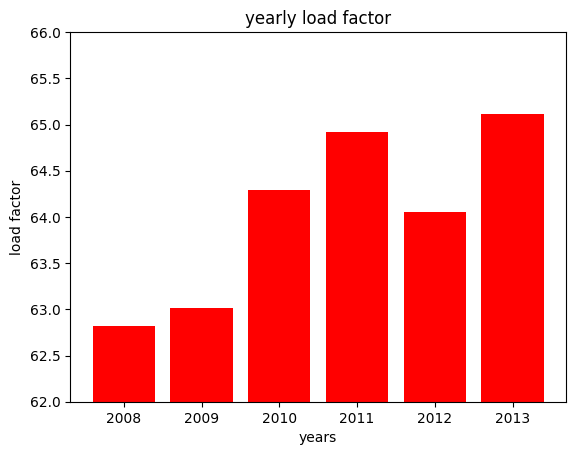

In [92]:
yearly_load_factor=(high_cloud_airlines.groupby('year')['load_factor']
                    .mean()
                    .round(2)
                    .reset_index()# so that we can sort by year and must be before sort
                    .sort_values('year',ascending=True))
print(yearly_load_factor)

yearly_load_factor_bar=plt.bar(yearly_load_factor['year'],yearly_load_factor['load_factor'],color='red')
plt.xlabel('years')
plt.ylabel('load factor')
plt.title('yearly load factor')
plt.ylim(62,66)

   year  freight_utilisation
0  2008                 6.52
1  2009                 6.57
2  2010                 6.97
3  2011                 6.82
4  2012                 6.86
5  2013                 6.52


(6.5, 7.0)

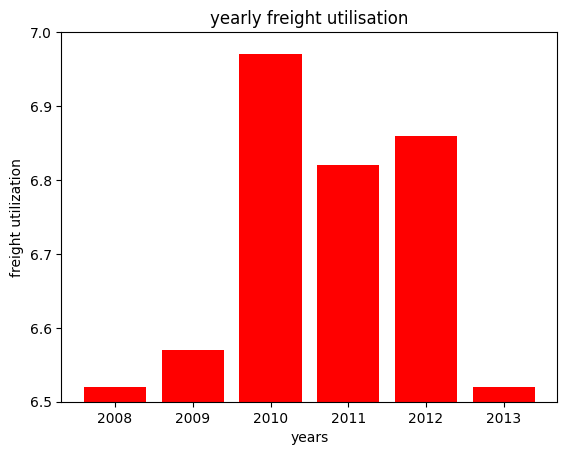

In [94]:
yearly_freight_utilisation=(high_cloud_airlines.groupby('year')['freight_utilisation']
                    .mean()
                    .round(2)
                    .reset_index()
                    .sort_values('year',ascending=True))
print(yearly_freight_utilisation)

yearly_freight_utilisation_bar=plt.bar(yearly_freight_utilisation['year'],yearly_freight_utilisation['freight_utilisation'],color='red')
plt.xlabel('years')
plt.ylabel('freight utilization')
plt.title('yearly freight utilisation')
plt.ylim(6.5,7)

  quarter  load_factor
0     Q 1        61.45
1     Q 2        65.09
2     Q 3        65.46
3     Q 4        64.11


(60.0, 66.0)

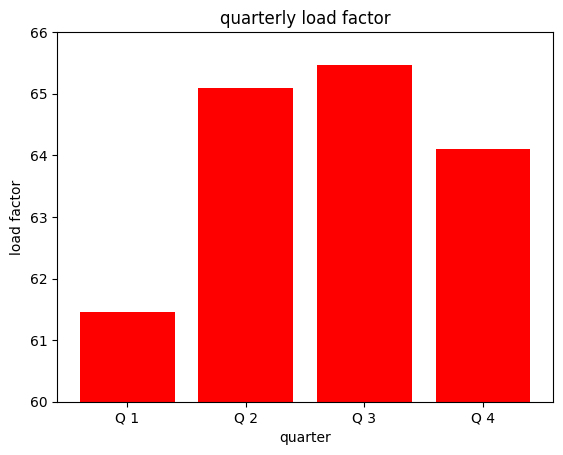

In [95]:
quarter_load_factor=(high_cloud_airlines.groupby('quarter')['load_factor']
                    .mean()
                    .round(2)
                    .reset_index()
                    .sort_values('quarter',ascending=True))
print(quarter_load_factor)

quarter_load_factor_bar=plt.bar(quarter_load_factor['quarter'],quarter_load_factor['load_factor'],color='red')
plt.xlabel('quarter')
plt.ylabel('load factor')
plt.title('quarterly load factor')
plt.ylim(60,66)

  quarter  freight_utilisation
0     Q 1                 6.45
1     Q 2                 6.51
2     Q 3                 6.77
3     Q 4                 7.11


(6.4, 7.2)

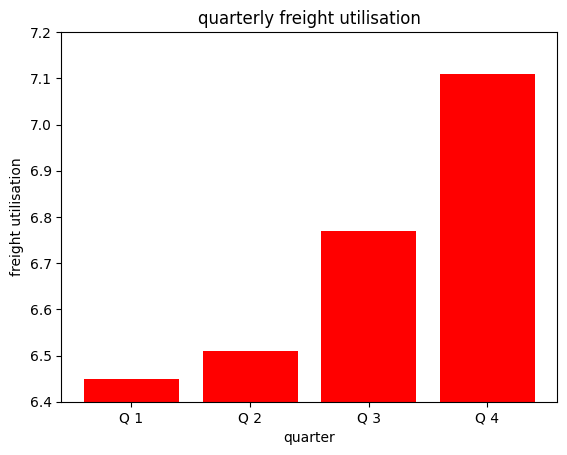

In [96]:
quarter_freight_utilisation=(high_cloud_airlines.groupby('quarter')['freight_utilisation']
                    .mean()
                    .round(2)
                    .reset_index()
                    .sort_values('quarter',ascending=True))
print(quarter_freight_utilisation)

quarter_freight_utilisation_bar=plt.bar(quarter_freight_utilisation['quarter'],quarter_freight_utilisation['freight_utilisation'],color='red')
plt.xlabel('quarter')
plt.ylabel('freight utilisation')
plt.title('quarterly freight utilisation')
plt.ylim(6.4,7.2)

   month_name  load_factor
0     January        59.58
1    February        60.37
2       March        64.39
3       April        64.19
4         May        64.03
5        June        66.98
6        July        67.28
7      August        65.87
8   September        63.14
9     October        64.71
10   November        64.00
11   December        63.64


(59.0, 68.0)

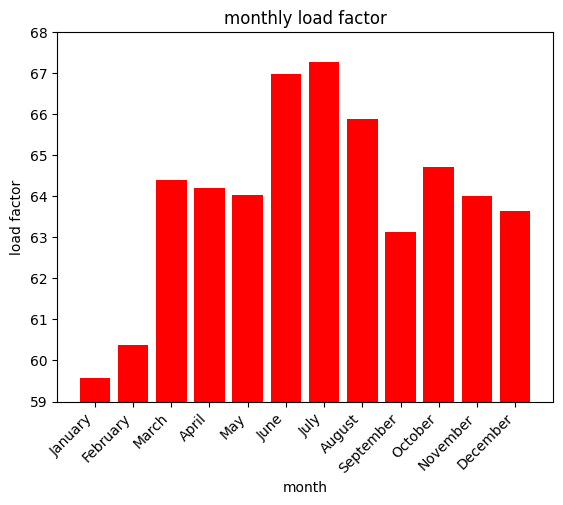

In [97]:
monthly_load_factor=(high_cloud_airlines.groupby(['month_no','month_name'])['load_factor']
                    .mean()
                    .round(2)
                    .reset_index()
                    .sort_values('month_no',ascending=True)
                    [['month_name','load_factor']])
print(monthly_load_factor)

monthly_load_factor_bar=plt.bar(monthly_load_factor['month_name'],monthly_load_factor['load_factor'],color='red')
plt.xlabel('month')
plt.ylabel('load factor')
plt.title('monthly load factor')
plt.xticks(rotation=45, ha='right')
plt.ylim(59,68)

   month_name  freight_utilisation
0     January                 6.39
1    February                 6.36
2       March                 6.61
3       April                 6.09
4         May                 6.59
5        June                 6.81
6        July                 6.61
7      August                 6.60
8   September                 7.10
9     October                 6.91
10   November                 6.78
11   December                 7.62


(6.0, 7.7)

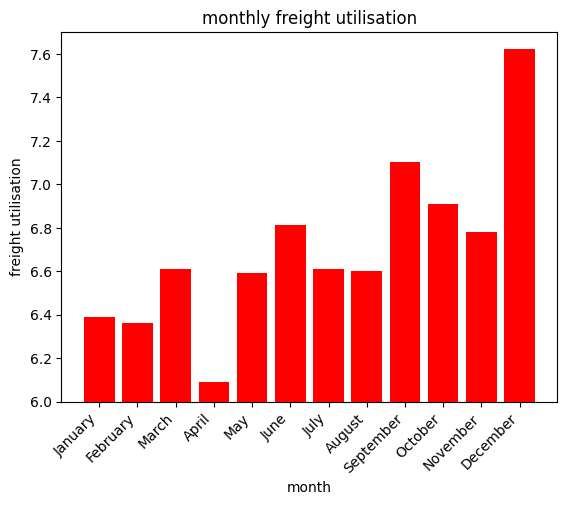

In [98]:
monthly_freight_utilisation=(high_cloud_airlines.groupby(['month_no','month_name'])['freight_utilisation']
                    .mean()
                    .round(2)
                    .reset_index()
                    .sort_values('month_no',ascending=True)
                    [['month_name','freight_utilisation']])
print(monthly_freight_utilisation)

monthly_freight_utilisation_bar=plt.bar(monthly_freight_utilisation['month_name'],monthly_freight_utilisation['freight_utilisation'],color='red')
plt.xlabel('month')
plt.ylabel('freight utilisation')
plt.title('monthly freight utilisation')
plt.xticks(rotation=45, ha='right')
plt.ylim(6,7.7)

                                        airlines  load_factor
1   Globespan Airways Limited d/b/a Flyglobespan        90.10
2                          Corsair International        88.55
3                      Skyservice Airlines, Inc.        88.12
4                       Sichuan Airlines Co Ltd.        88.11
5                                Jin Air Co Ltd.        86.43
6                              XL Airways France        86.06
7                                 Etihad Airways        85.98
8                    Jet Airways (India) Limited        83.44
9                                  Allegiant Air        83.07
10                   Jetstar Airways Pty Limited        82.18


(80.0, 92.0)

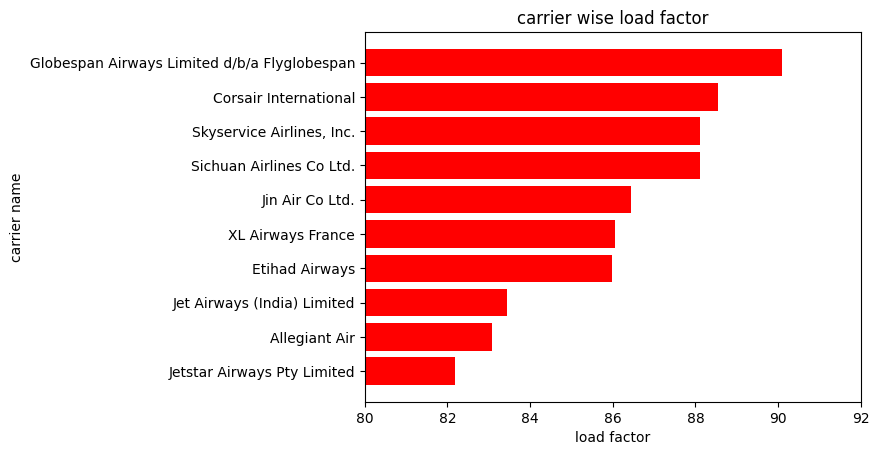

In [100]:
carrier_load_factor=(high_cloud_airlines.groupby('airlines')['load_factor']
                     .mean()
                     .round(2)
                     .reset_index()
                     .sort_values('load_factor',ascending=False)
                     .head(10))
carrier_load_factor.index=range(1,11)
carrier_load_factor['airlines']=carrier_load_factor['airlines'].str.split(':',expand=True)[0]
print(carrier_load_factor)

carrier_load_factor_barh=plt.barh(carrier_load_factor['airlines'],carrier_load_factor['load_factor'],color='red')
plt.xlabel('load factor')
plt.ylabel('carrier name')
plt.title('carrier wise load factor')
plt.gca().invert_yaxis()
plt.xlim(80,92)

                        airlines transported_passengers
1         Southwest Airlines Co.           341.08 lakhs
2           Delta Air Lines Inc.           288.37 lakhs
3                US Airways Inc.           156.47 lakhs
4     Continental Air Lines Inc.           131.24 lakhs
5                JetBlue Airways            73.12 lakhs
6    AirTran Airways Corporation             73.0 lakhs
7          SkyWest Airlines Inc.            71.27 lakhs
8         American Airlines Inc.            59.01 lakhs
9   American Eagle Airlines Inc.            49.57 lakhs
10          Alaska Airlines Inc.            48.83 lakhs


(45.0, 345.0)

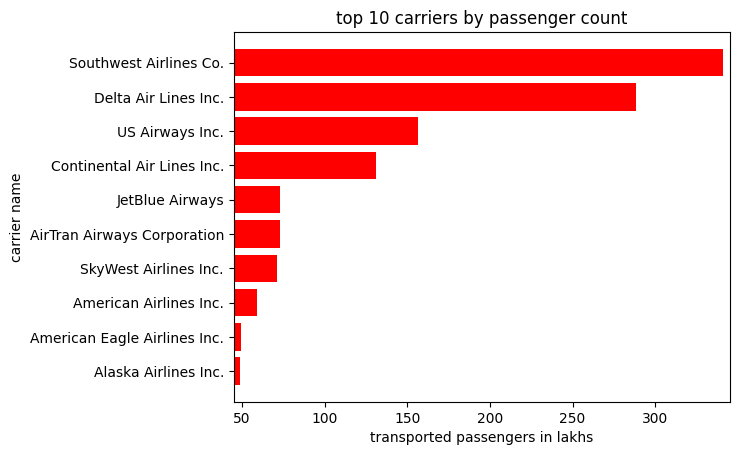

In [102]:
carrier_transported_passengers=(high_cloud_airlines.groupby('airlines')['transported_passengers']
                     .sum()
                     .reset_index()
                     .sort_values('transported_passengers',ascending=False)
                     .head(10))
carrier_transported_passengers.index=range(1,11)
carrier_transported_passengers['transported_passengers']=(carrier_transported_passengers['transported_passengers']/100000).round(2).astype(str)+' lakhs'
carrier_transported_passengers['airlines']=carrier_transported_passengers['airlines'].str.split(':',expand=True)[0]
print(carrier_transported_passengers)

carrier_transported_passengers_no=carrier_transported_passengers['transported_passengers'].str.split(' ',expand=True)[0]
carrier_transported_passengers_no=carrier_transported_passengers_no.astype('float')

carrier_transported_passengers_barh=plt.barh(carrier_transported_passengers['airlines'],carrier_transported_passengers_no,color='red')
plt.xlabel('transported passengers in lakhs')
plt.ylabel('carrier name')
plt.title('top 10 carriers by passenger count')
plt.gca().invert_yaxis()
plt.xlim(45,345)

      destination_market  transported_passengers
1          New York City                    4586
2                Atlanta                    3342
3                Chicago                    2963
4             Washington                    2884
5                Detroit                    2485
6                Houston                    2383
7            Los Angeles                    2323
8   Minneapolis/St. Paul                    2312
9                  Miami                    2230
10             Charlotte                    2187


(2000.0, 4600.0)

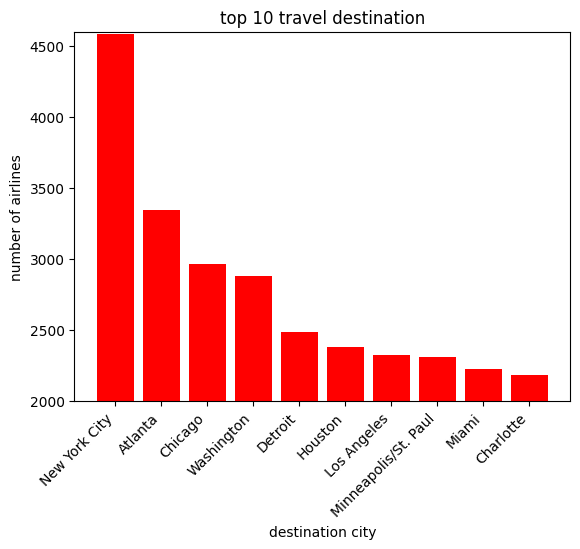

In [104]:
top_10_dest_pas=(high_cloud_airlines.groupby('destination_market')['transported_passengers']
             .count()
             .reset_index()
             .sort_values('transported_passengers',ascending=False)
             .head(10))
top_10_dest_pas.index=range(1,11)
top_10_dest_pas['destination_market']=top_10_dest_pas['destination_market'].str.split('"',expand=True)[1]
print(top_10_dest_pas)

top_10_dest_pas_bar=plt.bar(top_10_dest_pas['destination_market'],top_10_dest_pas['transported_passengers'],color='red')
plt.xlabel('destination city')
plt.ylabel('number of airlines')
plt.title('top 10 travel destination')
plt.xticks(rotation=45, ha='right')
plt.ylim(2000, 4600)

   destination_market transported_freight
1             Memphis      11833.14 lakhs
2          Louisville       6471.46 lakhs
3           Anchorage       5362.52 lakhs
4               Miami       4142.35 lakhs
5       New York City       4052.78 lakhs
6         Los Angeles       3736.72 lakhs
7        Indianapolis       3003.03 lakhs
8       San Francisco       2457.42 lakhs
9             Chicago       1828.69 lakhs
10  Dallas/Fort Worth       1548.91 lakhs


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Memphis'),
  Text(1, 0, 'Louisville'),
  Text(2, 0, 'Anchorage'),
  Text(3, 0, 'Miami'),
  Text(4, 0, 'New York City'),
  Text(5, 0, 'Los Angeles'),
  Text(6, 0, 'Indianapolis'),
  Text(7, 0, 'San Francisco'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'Dallas/Fort Worth')])

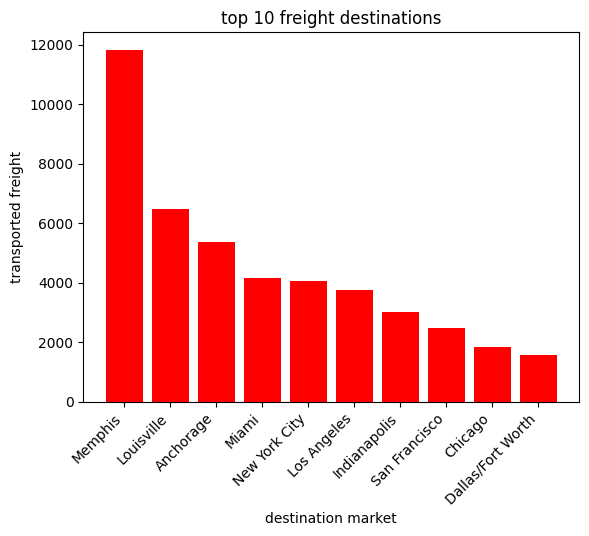

In [107]:
top_10_dest_freight=(high_cloud_airlines.groupby('destination_market')['transported_freight']
             .sum()
             .reset_index()
             .sort_values('transported_freight',ascending=False)
             .head(10))
top_10_dest_freight.index=range(1,11)
top_10_dest_freight['destination_market']=top_10_dest_freight['destination_market'].str.split('"',expand=True)[1]
top_10_dest_freight['transported_freight']=(top_10_dest_freight['transported_freight']/100000).round(2).astype(str)+' lakhs'
print(top_10_dest_freight)

top_10_dest_freight_no=top_10_dest_freight['transported_freight'].str.split(' ',expand=True)[0]
top_10_dest_freight_no=top_10_dest_freight_no.astype('float')

top_10_dest_freight_bar=plt.bar(top_10_dest_freight['destination_market'],top_10_dest_freight_no,color='red')
plt.xlabel('destination market')
plt.ylabel('transported freight')
plt.title('top 10 freight destinations')
plt.xticks(rotation=45,ha='right')

   destination_market transported_passengers transported_freight
1       New York City           123.63 lakhs       4052.78 lakhs
2             Atlanta           123.34 lakhs       1494.68 lakhs
3             Chicago             73.0 lakhs       1828.69 lakhs
4         Los Angeles            72.04 lakhs       3736.72 lakhs
5          Washington            68.46 lakhs        861.08 lakhs
6             Houston            68.22 lakhs        720.93 lakhs
7             Phoenix            59.12 lakhs        727.44 lakhs
8           Charlotte            55.53 lakhs        323.67 lakhs
9       San Francisco            55.49 lakhs       2457.42 lakhs
10          Las Vegas            53.24 lakhs        354.88 lakhs


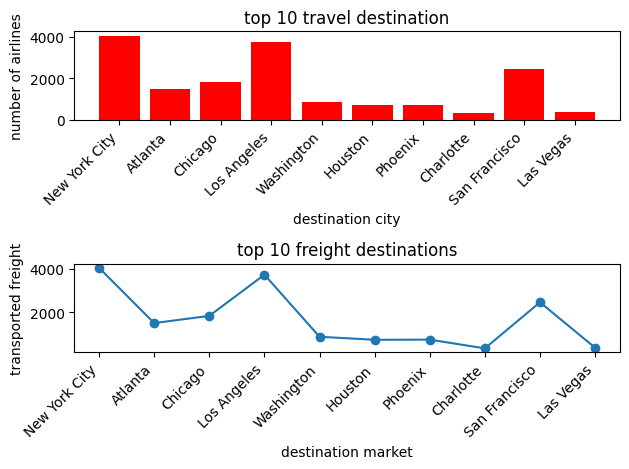

In [166]:
top_10_dest=(high_cloud_airlines.groupby('destination_market')[['transported_passengers','transported_freight']]
             .sum()
             .reset_index()
             .sort_values('transported_passengers',ascending=False)
             .head(10))
top_10_dest.index=range(1,11)
top_10_dest['destination_market']=top_10_dest['destination_market'].str.split('"',expand=True)[1]
top_10_dest['transported_passengers']=(top_10_dest['transported_passengers']/100000).round(2).astype(str)+' lakhs'
top_10_dest['transported_freight']=(top_10_dest['transported_freight']/100000).round(2).astype(str)+' lakhs'
print(top_10_dest)

top_10_dest_f_no=top_10_dest['transported_freight'].str.split(' ',expand=True)[0]
top_10_dest_f_no=top_10_dest_f_no.astype('float')
top_10_dest_p_no=top_10_dest['transported_passengers'].str.split(' ',expand=True)[0]
top_10_dest_p_no=top_10_dest_f_no.astype('float')

plt.subplot(2,1,1)
top_10_dest_bar=plt.bar(top_10_dest['destination_market'],top_10_dest_p_no,color='red')
plt.xlabel('destination city')
plt.ylabel('number of airlines')
plt.title('top 10 travel destination')
plt.xticks(rotation=45, ha='right')
plt.subplot(2,1,2)
top_10_dest_line=plt.plot(top_10_dest['destination_market'],top_10_dest_f_no,marker='o')
plt.xlabel('destination market')
plt.ylabel('transported freight')
plt.title('top 10 freight destinations')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

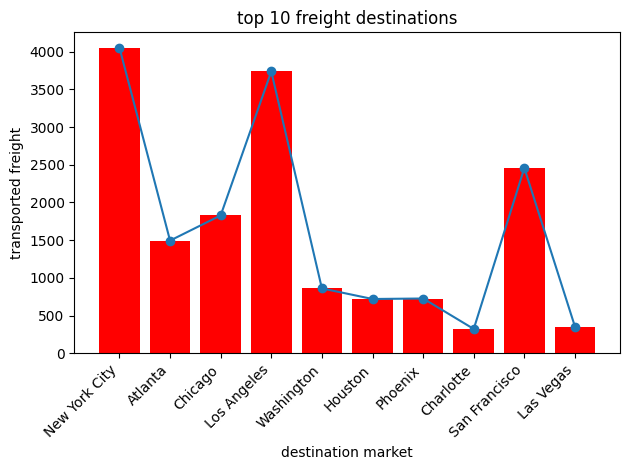

In [165]:
top_10_dest_bar=plt.bar(top_10_dest['destination_market'],top_10_dest_p_no,color='red')
plt.xlabel('destination city')
plt.ylabel('number of airlines')
plt.title('top 10 travel destination')
plt.xticks(rotation=45, ha='right')

top_10_dest_line=plt.plot(top_10_dest['destination_market'],top_10_dest_f_no,marker='o')
plt.xlabel('destination market')
plt.ylabel('transported freight')
plt.title('top 10 freight destinations')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

  weekday_end  transported_passengers  percent_of_total
1     Weekday                13327.04             71.26
2     Weekend                 5375.22             28.74


Text(0.5, 1.0, 'travel trends')

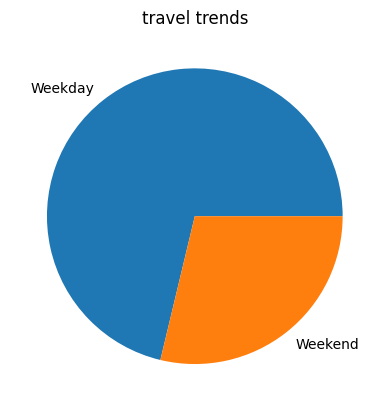

In [111]:
travel_trends=(high_cloud_airlines.groupby('weekday_end')['transported_passengers']
               .sum()
               .reset_index()
               .sort_values('transported_passengers',ascending=False))
travel_trends['transported_passengers']=(travel_trends['transported_passengers']/10000).round(2)
travel_trends['percent_of_total']=(travel_trends['transported_passengers']*100/travel_trends['transported_passengers'].sum()).round(2)
travel_trends.index=range(1,3)
print(travel_trends)

travel_trends_pie=plt.pie(travel_trends['transported_passengers'],labels=travel_trends['weekday_end'])
plt.title('travel trends')

      distance_interval  load_factor
1   Less Than 500 Miles        53.37
2         500-999 Miles        74.23
3       1000-1499 Miles        77.41
4       1500-1999 Miles        79.50
5       2000-2499 Miles        78.85
6       2500-2999 Miles        78.03
7       3000-3499 Miles        71.52
8       3500-3999 Miles        73.54
9       4000-4499 Miles        77.85
10      4500-4999 Miles        76.16
11      5000-5499 Miles        73.28
12      5500-5999 Miles        73.63
13      6000-6499 Miles        76.08
14      6500-6999 Miles        79.25
15      7000-7499 Miles        83.84
16      7500-7999 Miles        74.40
17      8000-8499 Miles        82.38
18      8500-8999 Miles        87.68
19    10000-10499 Miles        14.29


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Less Than 500 Miles'),
  Text(1, 0, '500-999 Miles'),
  Text(2, 0, '1000-1499 Miles'),
  Text(3, 0, '1500-1999 Miles'),
  Text(4, 0, '2000-2499 Miles'),
  Text(5, 0, '2500-2999 Miles'),
  Text(6, 0, '3000-3499 Miles'),
  Text(7, 0, '3500-3999 Miles'),
  Text(8, 0, '4000-4499 Miles'),
  Text(9, 0, '4500-4999 Miles'),
  Text(10, 0, '5000-5499 Miles'),
  Text(11, 0, '5500-5999 Miles'),
  Text(12, 0, '6000-6499 Miles'),
  Text(13, 0, '6500-6999 Miles'),
  Text(14, 0, '7000-7499 Miles'),
  Text(15, 0, '7500-7999 Miles'),
  Text(16, 0, '8000-8499 Miles'),
  Text(17, 0, '8500-8999 Miles'),
  Text(18, 0, '10000-10499 Miles')])

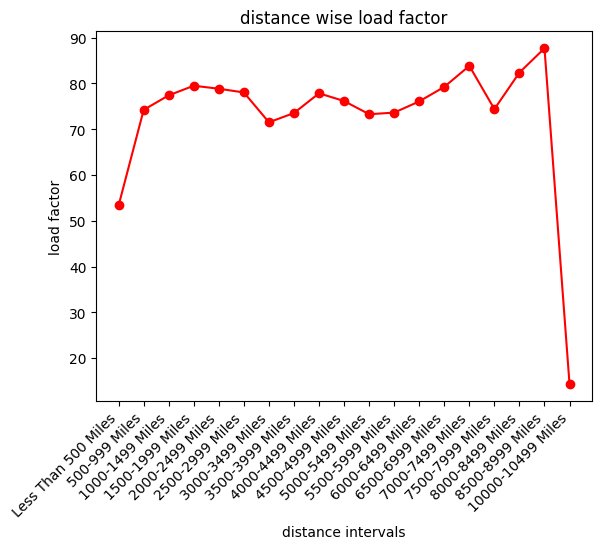

In [162]:
distance_analysis_lf=(high_cloud_airlines.groupby(['distance_interval','distance_group_id'])['load_factor']
                   .mean()
                   .round(2)
                   .reset_index()
                   .sort_values('distance_group_id',ascending=True))
distance_analysis_lf.index=range(1,20)
distance_analysis_lf=distance_analysis_lf[['distance_interval','load_factor']]
print(distance_analysis_lf)

distance_analysis_lf_line=plt.plot(distance_analysis_lf['distance_interval'],distance_analysis_lf['load_factor'],color='red',marker='o')
plt.xlabel('distance intervals')
plt.ylabel('load factor')
plt.title('distance wise load factor')
plt.xticks(rotation=45,ha='right')

      distance_interval  freight_utilisation
1   Less Than 500 Miles                 5.44
2         500-999 Miles                 5.74
3       1000-1499 Miles                 5.90
4       1500-1999 Miles                11.64
5       2000-2499 Miles                 6.65
6       2500-2999 Miles                14.51
7       3000-3499 Miles                31.28
8       3500-3999 Miles                22.08
9       4000-4499 Miles                29.92
10      4500-4999 Miles                21.55
11      5000-5499 Miles                24.10
12      5500-5999 Miles                13.98
13      6000-6499 Miles                20.94
14      6500-6999 Miles                21.16
15      7000-7499 Miles                21.99
16      7500-7999 Miles                15.37
17      8000-8499 Miles                29.35
18      8500-8999 Miles                20.28
19    10000-10499 Miles                 0.00


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Less Than 500 Miles'),
  Text(1, 0, '500-999 Miles'),
  Text(2, 0, '1000-1499 Miles'),
  Text(3, 0, '1500-1999 Miles'),
  Text(4, 0, '2000-2499 Miles'),
  Text(5, 0, '2500-2999 Miles'),
  Text(6, 0, '3000-3499 Miles'),
  Text(7, 0, '3500-3999 Miles'),
  Text(8, 0, '4000-4499 Miles'),
  Text(9, 0, '4500-4999 Miles'),
  Text(10, 0, '5000-5499 Miles'),
  Text(11, 0, '5500-5999 Miles'),
  Text(12, 0, '6000-6499 Miles'),
  Text(13, 0, '6500-6999 Miles'),
  Text(14, 0, '7000-7499 Miles'),
  Text(15, 0, '7500-7999 Miles'),
  Text(16, 0, '8000-8499 Miles'),
  Text(17, 0, '8500-8999 Miles'),
  Text(18, 0, '10000-10499 Miles')])

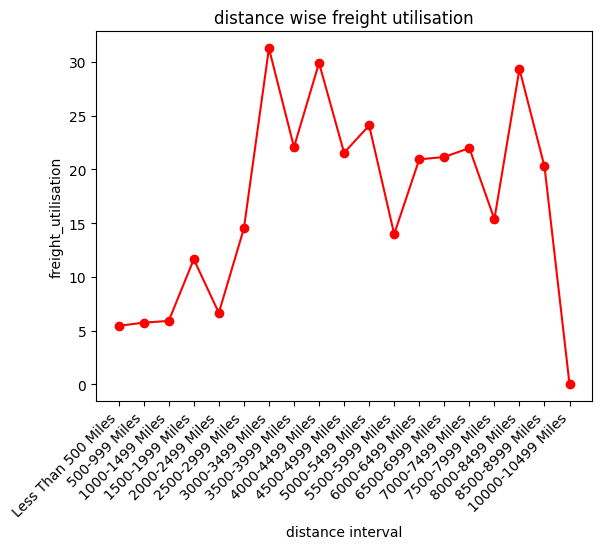

In [163]:
distance_analysis_fu=(high_cloud_airlines.groupby(['distance_interval','distance_group_id'])['freight_utilisation']
                   .mean()
                   .round(2)
                   .reset_index()
                   .sort_values('distance_group_id',ascending=True))
distance_analysis_fu.index=range(1,20)
distance_analysis_fu=distance_analysis_fu[['distance_interval','freight_utilisation']]
print(distance_analysis_fu)

distance_analysis_fu_line=plt.plot(distance_analysis_fu['distance_interval'],distance_analysis_fu['freight_utilisation'],color='red',marker='o')
plt.xlabel('distance interval')
plt.ylabel('freight_utilisation')
plt.title('distance wise freight utilisation')
plt.xticks(rotation=45,ha='right')

      distance_interval  load_factor
1   Less Than 500 Miles        49462
2         500-999 Miles        24526
3       1000-1499 Miles         9938
4       1500-1999 Miles         4830
5       2000-2499 Miles         2068
6       2500-2999 Miles          668
7       3000-3499 Miles          353
8       3500-3999 Miles          763
9       4000-4499 Miles          538
10      4500-4999 Miles          415
11      5000-5499 Miles          303
12      5500-5999 Miles          114
13      6000-6499 Miles           65
14      6500-6999 Miles          141
15      7000-7499 Miles           96
16      7500-7999 Miles           54
17      8000-8499 Miles           22
18      8500-8999 Miles            4
19    10000-10499 Miles            1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Less Than 500 Miles'),
  Text(1, 0, '500-999 Miles'),
  Text(2, 0, '1000-1499 Miles'),
  Text(3, 0, '1500-1999 Miles'),
  Text(4, 0, '2000-2499 Miles'),
  Text(5, 0, '2500-2999 Miles'),
  Text(6, 0, '3000-3499 Miles'),
  Text(7, 0, '3500-3999 Miles'),
  Text(8, 0, '4000-4499 Miles'),
  Text(9, 0, '4500-4999 Miles'),
  Text(10, 0, '5000-5499 Miles'),
  Text(11, 0, '5500-5999 Miles'),
  Text(12, 0, '6000-6499 Miles'),
  Text(13, 0, '6500-6999 Miles'),
  Text(14, 0, '7000-7499 Miles'),
  Text(15, 0, '7500-7999 Miles'),
  Text(16, 0, '8000-8499 Miles'),
  Text(17, 0, '8500-8999 Miles'),
  Text(18, 0, '10000-10499 Miles')])

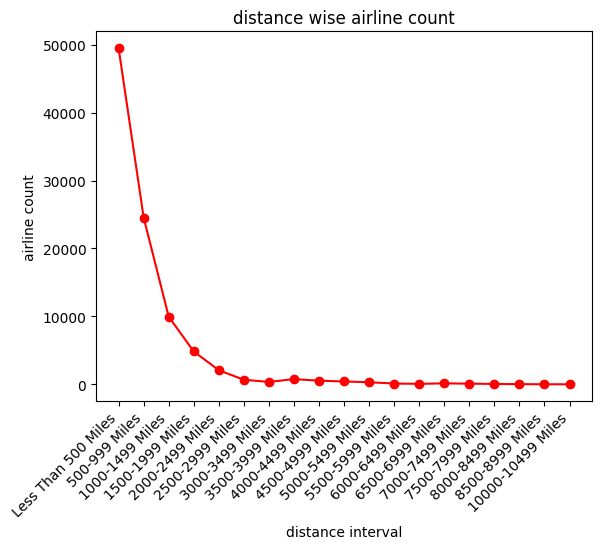

In [164]:
distance_analysis_count=(high_cloud_airlines.groupby(['distance_interval','distance_group_id'])['load_factor']
                   .count()
                   .reset_index()
                   .sort_values('distance_group_id',ascending=True))
distance_analysis_count.index=range(1,20)
distance_analysis_count=distance_analysis_count[['distance_interval','load_factor']]
print(distance_analysis_count)

distance_analysis_count_line=plt.plot(distance_analysis_count['distance_interval'],distance_analysis_count['load_factor'],color='red',marker='o')
plt.xlabel('distance interval')
plt.ylabel('airline count')
plt.title('distance wise airline count')
plt.xticks(rotation=45,ha='right')

  carriers_operating_region transported_passengers
1                  Domestic         16223.11 lakhs
2             Latin America          1231.05 lakhs
3                  Atlantic           771.55 lakhs
4                   Pacific           316.23 lakhs
5             International           159.58 lakhs
6                    System             0.75 lakhs


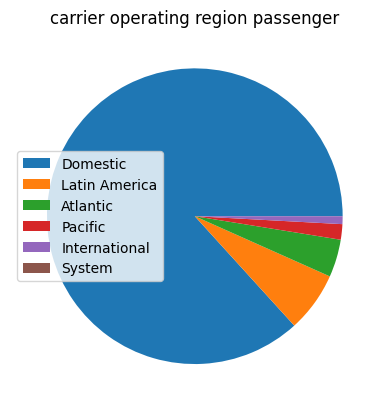

In [132]:
operating_region_pas=(high_cloud_airlines.groupby('carriers_operating_region')['transported_passengers']
                  .sum()
                  .reset_index()
                  .sort_values('transported_passengers',ascending=False))
operating_region_pas.index=range(1,7)
operating_region_pas['transported_passengers']=(operating_region_pas['transported_passengers']/10000).round(2).astype(str)+' lakhs'
print(operating_region_pas)

operating_region_pas_no=operating_region_pas['transported_passengers'].str.split(' ',expand=True)[0]
operating_region_pas_no=operating_region_pas_no.astype('float')

operating_region_pas_pie=plt.pie(operating_region_pas_no)
plt.title('carrier operating region passenger')
plt.legend(operating_region_pas['carriers_operating_region'])

  carriers_operating_region transported_freight
1                  Domestic  590168.1 lakhs lbs
2                   Pacific  71759.84 lakhs lbs
3                  Atlantic  69543.69 lakhs lbs
4             International  65967.38 lakhs lbs
5             Latin America   51762.1 lakhs lbs
6                    System      0.01 lakhs lbs


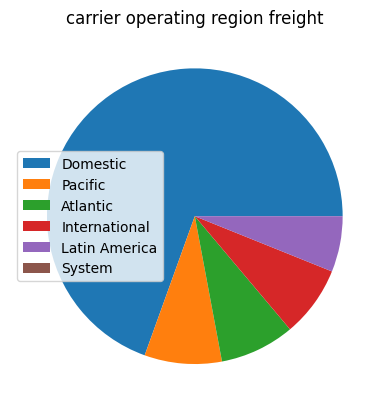

In [135]:
operating_region_freight=(high_cloud_airlines.groupby('carriers_operating_region')['transported_freight']
                  .sum()
                  .reset_index()
                  .sort_values('transported_freight',ascending=False))
operating_region_freight.index=range(1,7)
operating_region_freight['transported_freight']=(operating_region_freight['transported_freight']/10000).round(2).astype(str)+' lakhs lbs'
print(operating_region_freight)

operating_region_freight_no=operating_region_freight['transported_freight'].str.split(' ',expand=True)[0]
operating_region_freight_no=operating_region_freight_no.astype('float')

operating_region_freight_pie=plt.pie(operating_region_freight_no)
plt.title('carrier operating region freight')
plt.legend(operating_region_freight['carriers_operating_region'])

                   aircraft_type  load_factor
1          Airbus Industrie A340        85.22
2      Airbus Industrie A340-500        82.60
3   Boeing 777-200er/200lr/233lr        81.26
4                 Boeing 737-900        80.99
5                Airbus A330-300        80.62
6          Airbus Industrie A321        80.54
7              Boeing 767-400/Er        79.66
8        Mcdonnell Douglas Md-90        79.36
9      Airbus Industrie A330-200        79.04
10        Airbus Industrie A-318        78.95


(78.0, 86.0)

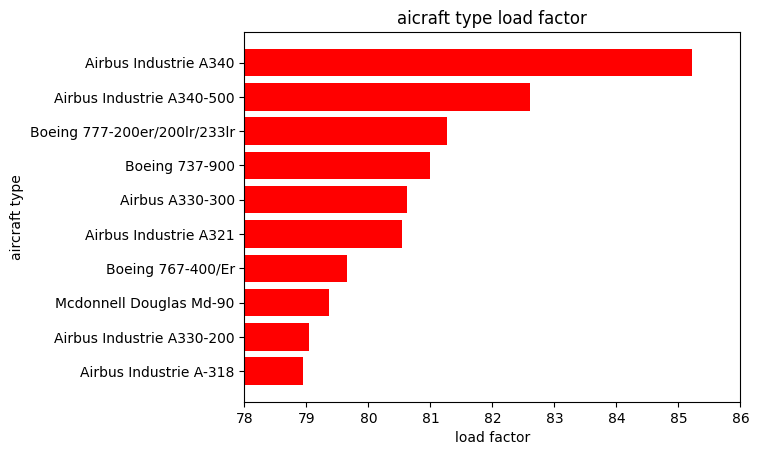

In [142]:
plane_type_pas=(high_cloud_airlines.groupby('aircraft_type')['load_factor']
            .mean()
            .round(2)
            .reset_index()
            .sort_values('load_factor',ascending=False))[:10]
plane_type_pas.index=range(1,11)
print(plane_type_pas)

plane_type_pas_barh=plt.barh(plane_type_pas['aircraft_type'],plane_type_pas['load_factor'],color='red')
plt.xlabel('load factor')
plt.ylabel('aircraft type')
plt.title('aicraft type load factor')
plt.gca().invert_yaxis()
plt.xlim(78,86)

                         aircraft_type  freight_utilisation
1                      Boeing 747-400f                70.79
2         Mcdonnell Douglas Dc-10-30cf                68.60
3                        Boeing B777-F                65.17
4           Mcdonnell Douglas Dc-10-10                59.68
5   Airbus Industrie A300b/C/F-100/200                58.28
6   Airbus Industrie A300-600/R/Cf/Rcf                52.75
7              Mcdonnell Douglas Md-11                51.86
8                            Beech C99                51.17
9                       Boeing 747-100                50.72
10        Airbus Industrie A310-200c/F                49.31


(49.0, 71.0)

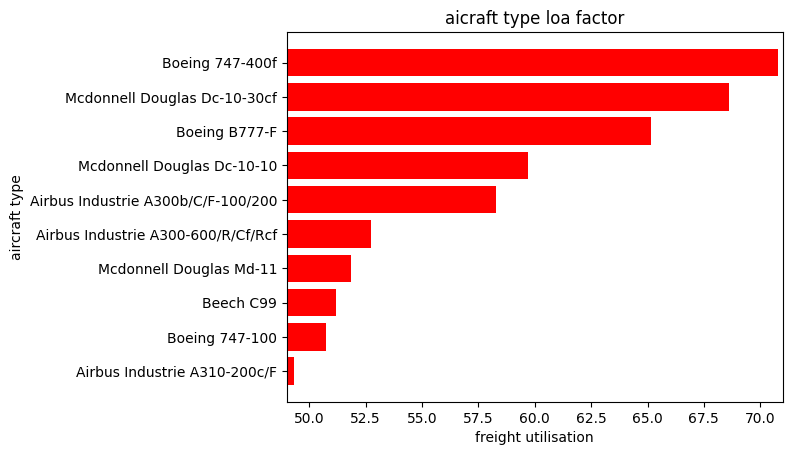

In [141]:
plane_type_freight=(high_cloud_airlines.groupby('aircraft_type')['freight_utilisation']
            .mean()
            .round(2)
            .reset_index()
            .sort_values('freight_utilisation',ascending=False))[:10]
plane_type_freight.index=range(1,11)
print(plane_type_freight)

plane_type_freight_barh=plt.barh(plane_type_freight['aircraft_type'],plane_type_freight['freight_utilisation'],color='red')
plt.xlabel('freight utilisation')
plt.ylabel('aircraft type')
plt.title('aicraft type freight utilisation')
plt.gca().invert_yaxis()
plt.xlim(49,71)

In [58]:
passenger_count=((high_cloud_airlines['transported_passengers'].sum())/10000).round(2).astype(str)
print(passenger_count+' lakhs number of passengers transported')

18702.26 lakhs number of passengers transported


In [59]:
carrier_count=(high_cloud_airlines['transported_passengers'].count()).astype(str)
print(carrier_count+' carriers operational')

110851 carriers operational


In [60]:
avg_dist=(high_cloud_airlines['distance'].mean()).round(2).astype(str)
print(avg_dist+' miles travelled on average')

742.79 miles travelled on average
